<a target="_blank" href="https://colab.research.google.com/github/victorlymarev/pandas/blob/main/notebooks/15-concat-and-merge.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import pandas as pd
import os

In [2]:
path_marks = '../tables/оценки.xlsx' if os.path.exists('../tables/оценки.xlsx') else 'https://drive.google.com/uc?id=17f4DXx53J0WooNkhO13xidseZJ-O2obs'

marks_6a, marks_6b, marks_6v, marks_6g = pd.read_excel(path_marks, sheet_name=None).values()

## Concat

Метод соединяет таблицы между собой

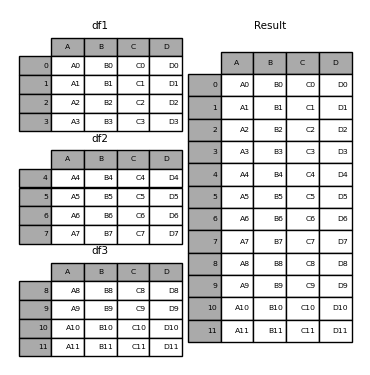

In [3]:
marks_6a.head(3)

,ФИО,Пол,Математика,Русский язык,Литература,Физика,История,Физическая культура
0,Суханова Маргарита Богдановна,женский,3,3,3,3,3,5
1,Лаврентьев Давид Анатольевич,мужской,3,3,3,5,3,3
2,Винниченко Дарья Максимовна,женский,4,5,5,3,4,5


In [4]:
pd.concat([marks_6a, marks_6b, marks_6v, marks_6g])

,ФИО,Пол,Математика,Русский язык,Литература,Физика,История,Физическая культура
0,Суханова Маргарита Богдановна,женский,3,3,3,3,3,5
1,Лаврентьев Давид Анатольевич,мужской,3,3,3,5,3,3
2,Винниченко Дарья Максимовна,женский,4,5,5,3,4,5
3,Козлова Маргарита Максимовна,женский,5,5,5,5,4,5
4,Кулешов Евгений Маратович,мужской,3,3,4,3,4,3
...,...,...,...,...,...,...,...,...
16,Курочкин Максим Александрович,мужской,5,5,4,4,3,5
17,Агапов Петр Арсеньевич,мужской,4,4,4,4,5,5
18,Фомичева Маргарита Ивановна,женский,3,3,5,4,3,5
19,Скрипко Валентина Александровна,женский,5,5,3,5,4,4


In [5]:
pd.concat([marks_6a.drop('Математика', axis=1), marks_6b, marks_6v, marks_6g])

,ФИО,Пол,Русский язык,Литература,Физика,История,Физическая культура,Математика
0,Суханова Маргарита Богдановна,женский,3,3,3,3,5,NaN
1,Лаврентьев Давид Анатольевич,мужской,3,3,5,3,3,NaN
2,Винниченко Дарья Максимовна,женский,5,5,3,4,5,NaN
3,Козлова Маргарита Максимовна,женский,5,5,5,4,5,NaN
4,Кулешов Евгений Маратович,мужской,3,4,3,4,3,NaN
...,...,...,...,...,...,...,...,...
16,Курочкин Максим Александрович,мужской,5,4,4,3,5,5.0
17,Агапов Петр Арсеньевич,мужской,4,4,4,5,5,4.0
18,Фомичева Маргарита Ивановна,женский,3,5,4,3,5,3.0
19,Скрипко Валентина Александровна,женский,5,3,5,4,4,5.0


In [6]:
pd.concat([marks_6a, marks_6b, marks_6v, marks_6g], ignore_index=True)
# Это будет эквивалентно тому 
# pd.concat([marks_a6, marks_b6, marks_v6, marks_g6]).reset_index(drop=True)

,ФИО,Пол,Математика,Русский язык,Литература,Физика,История,Физическая культура
0,Суханова Маргарита Богдановна,женский,3,3,3,3,3,5
1,Лаврентьев Давид Анатольевич,мужской,3,3,3,5,3,3
2,Винниченко Дарья Максимовна,женский,4,5,5,3,4,5
3,Козлова Маргарита Максимовна,женский,5,5,5,5,4,5
4,Кулешов Евгений Маратович,мужской,3,3,4,3,4,3
...,...,...,...,...,...,...,...,...
72,Курочкин Максим Александрович,мужской,5,5,4,4,3,5
73,Агапов Петр Арсеньевич,мужской,4,4,4,4,5,5
74,Фомичева Маргарита Ивановна,женский,3,3,5,4,3,5
75,Скрипко Валентина Александровна,женский,5,5,3,5,4,4


Можно добавить дополнительную колонку, которая будет говорить из какой таблицы взята строка

In [7]:
pd.concat([marks_6a, marks_6b, marks_6v, marks_6g], keys=['6а', '6б', '6в', '6г'])

ФИО      Пол  Математика  Русский язык  \
6а 0     Суханова Маргарита Богдановна  женский           3             3   
   1      Лаврентьев Давид Анатольевич  мужской           3             3   
   2       Винниченко Дарья Максимовна  женский           4             5   
   3      Козлова Маргарита Максимовна  женский           5             5   
   4         Кулешов Евгений Маратович  мужской           3             3   
...                                ...      ...         ...           ...   
6г 16    Курочкин Максим Александрович  мужской           5             5   
   17           Агапов Петр Арсеньевич  мужской           4             4   
   18      Фомичева Маргарита Ивановна  женский           3             3   
   19  Скрипко Валентина Александровна  женский           5             5   
   20      Киселева Анастасия Ивановна  женский           5             3   

       Литература  Физика  История  Физическая культура  
6а 0            3       3        3                    5  
   1            3       5        3                    3  
   2            5       3        4                    5  
   3            5       5        4                    5  
   4            4       3        4                    3  
...           ...     ...      ...                  ...  
6г 16           4       4        3                    5  
   17           4       4        5                    5  
   18           5       4        3                    5  
   19           3       5        4                    4  
   20           3       5        3                    5  

[77 rows x 8 columns]

In [8]:
(pd.concat([marks_6a, marks_6b, marks_6v, marks_6g], keys=['6а', '6б', '6в', '6г'])
    .reset_index(level=0, names='Класс')
    .head()
)

,Класс,ФИО,Пол,Математика,Русский язык,Литература,Физика,История,Физическая культура
0,6а,Суханова Маргарита Богдановна,женский,3,3,3,3,3,5
1,6а,Лаврентьев Давид Анатольевич,мужской,3,3,3,5,3,3
2,6а,Винниченко Дарья Максимовна,женский,4,5,5,3,4,5
3,6а,Козлова Маргарита Максимовна,женский,5,5,5,5,4,5
4,6а,Кулешов Евгений Маратович,мужской,3,3,4,3,4,3


## merge

#### Соединяет разные таблицы на основе общих колонок

In [9]:
url = 'https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%BB%D0%BE%D0%B2%D0%B5%D0%BA_%D0%B3%D0%BE%D0%B4%D0%B0_(Time)'

year = (pd.read_html(url)
            [1]
            [['Год', 'Лауреат']]
            .drop_duplicates('Лауреат')
            .sample(60, random_state=2)
            .sort_values('Год')
)

lifetime = (pd.read_html(url)
                [1]
                [['Лауреат', 'Годы жизни']]
                .drop_duplicates('Лауреат')
                .sample(50, random_state=12)
                .fillna('нет')
                .sort_index()
)

In [10]:
year.head()

,Год,Лауреат
0,1927,Чарльз Линдберг
1,1928,Уолтер Крайслер
2,1929,Оуэн Юнг
3,1930,Махатма Ганди
5,1932,Франклин Рузвельт


In [11]:
lifetime.head()

,Лауреат,Годы жизни
1,Уолтер Крайслер,1875—1940
4,Пьер Лаваль,1883—1945
8,Хайле Селассие I,1892—1975
9,Уоллис Симпсон,1896—1986
11,Сун Мэйлин,1897—2003


Соединяем таблицы на основе колонки 'Лауреат', беря ключи из левой таблицы (year)

In [12]:
year.merge(lifetime, on='Лауреат', how='left').head(10)

,Год,Лауреат,Годы жизни
0,1927,Чарльз Линдберг,NaN
1,1928,Уолтер Крайслер,1875—1940
2,1929,Оуэн Юнг,NaN
3,1930,Махатма Ганди,NaN
4,1932,Франклин Рузвельт,NaN
5,1933,Хью Джонсон,NaN
6,1936,Уоллис Симпсон,1896—1986
7,1937,Чан Кайши,NaN
8,1937,Сун Мэйлин,1897—2003
9,1938,Адольф Гитлер,1889—1945


Соединяем таблицы на основе колонки 'Лауреат', беря ключи из правой таблицы (lifetime)

In [13]:
year.merge(lifetime, on='Лауреат', how='right').head(5)

,Год,Лауреат,Годы жизни
0,1928.0,Уолтер Крайслер,1875—1940
1,NaN,Пьер Лаваль,1883—1945
2,NaN,Хайле Селассие I,1892—1975
3,1936.0,Уоллис Симпсон,1896—1986
4,1937.0,Сун Мэйлин,1897—2003


Соединяем таблицы на основе колонки 'Лауреат', беря ключи, которые есть хотя бы в одной таблице

In [14]:
year.merge(lifetime, on='Лауреат', how='outer').sample(10, random_state=0)

,Год,Лауреат,Годы жизни
52,2015.0,Ангела Меркель[6],NaN
57,2020.0,Камала Харрис[14],NaN
22,1960.0,Учёные США,NaN
74,NaN,«Разоблачители»,нет
28,1970.0,Вилли Брандт,1913—1992
26,1965.0,Уильям Уэстморленд,NaN
66,NaN,Джон Сирика,1904—1992
54,2017.0,«Нарушители молчания»[8][9],NaN
34,1984.0,Питер Юберрот,NaN
7,1937.0,Чан Кайши,NaN


Соединяем таблицы на основе колонки 'Лауреат', беря ключи, которые есть в каждой таблице

In [15]:
year.merge(lifetime, on='Лауреат', how='inner').head(10)

,Год,Лауреат,Годы жизни
0,1928,Уолтер Крайслер,1875—1940
1,1936,Уоллис Симпсон,1896—1986
2,1937,Сун Мэйлин,1897—2003
3,1938,Адольф Гитлер,1889—1945
4,1939,Иосиф Сталин,1878—1953
5,1943,Джордж Маршалл,1880—1959
6,1946,Джеймс Бирнс,1879—1972
7,1951,Мохаммед Мосаддык,1882—1967
8,1953,Конрад Аденауэр,1876—1967
9,1955,Харлоу Кёртис,1893—1962


#### Соединяем таблицы с разными названиями колонок

In [16]:
year_copy = year.rename({'Лауреат': 'Человек'}, axis=1)
year_copy.head()

,Год,Человек
0,1927,Чарльз Линдберг
1,1928,Уолтер Крайслер
2,1929,Оуэн Юнг
3,1930,Махатма Ганди
5,1932,Франклин Рузвельт


In [17]:
lifetime.head()

,Лауреат,Годы жизни
1,Уолтер Крайслер,1875—1940
4,Пьер Лаваль,1883—1945
8,Хайле Селассие I,1892—1975
9,Уоллис Симпсон,1896—1986
11,Сун Мэйлин,1897—2003


Можно использовать метод rename, после чего объединить таблицы как прежде

In [18]:
(year_copy
    .rename({'Человек': 'Лауреат'}, axis=1)
 
    .merge(lifetime, on='Лауреат', how='inner')
    .head()
)

,Год,Лауреат,Годы жизни
0,1928,Уолтер Крайслер,1875—1940
1,1936,Уоллис Симпсон,1896—1986
2,1937,Сун Мэйлин,1897—2003
3,1938,Адольф Гитлер,1889—1945
4,1939,Иосиф Сталин,1878—1953


In [19]:
(year_copy
    .merge(lifetime.rename({'Лауреат': 'Человек'}, axis=1), on='Человек', how='inner')
    .head()
)

,Год,Человек,Годы жизни
0,1928,Уолтер Крайслер,1875—1940
1,1936,Уоллис Симпсон,1896—1986
2,1937,Сун Мэйлин,1897—2003
3,1938,Адольф Гитлер,1889—1945
4,1939,Иосиф Сталин,1878—1953


Можно указать ключи левой и правой таблиц

In [20]:
(year_copy
    .merge(lifetime, left_on='Человек', right_on='Лауреат', how='inner')
    .head()
)

,Год,Человек,Лауреат,Годы жизни
0,1928,Уолтер Крайслер,Уолтер Крайслер,1875—1940
1,1936,Уоллис Симпсон,Уоллис Симпсон,1896—1986
2,1937,Сун Мэйлин,Сун Мэйлин,1897—2003
3,1938,Адольф Гитлер,Адольф Гитлер,1889—1945
4,1939,Иосиф Сталин,Иосиф Сталин,1878—1953


## join

Работает так же как и merge, только на основе индексов

In [21]:
year.set_index('Лауреат').join(lifetime.set_index('Лауреат'), how='left').head()

,Год,Годы жизни
Лауреат,,
Чарльз Линдберг,1927,NaN
Уолтер Крайслер,1928,1875—1940
Оуэн Юнг,1929,NaN
Махатма Ганди,1930,NaN
Франклин Рузвельт,1932,NaN


In [22]:
year.join(lifetime.set_index('Лауреат'), on='Лауреат', how='left').head()

,Год,Лауреат,Годы жизни
0,1927,Чарльз Линдберг,NaN
1,1928,Уолтер Крайслер,1875—1940
2,1929,Оуэн Юнг,NaN
3,1930,Махатма Ганди,NaN
5,1932,Франклин Рузвельт,NaN


## Отношения между таблицами

### Один к одному
Один ключ в одной таблице соответствует одному ключу в другой таблице

In [23]:
year.merge(lifetime, on='Лауреат', how='outer').head()

,Год,Лауреат,Годы жизни
0,1927.0,Чарльз Линдберг,NaN
1,1928.0,Уолтер Крайслер,1875—1940
2,1929.0,Оуэн Юнг,NaN
3,1930.0,Махатма Ганди,NaN
4,1932.0,Франклин Рузвельт,NaN


### Отношение один ко многим

In [24]:
year_full = (pd.read_html(url)
            [1]
            [['Год', 'Лауреат']]
            .sort_values('Год')
)

lifetime_full = (pd.read_html(url)
                [1]
                [['Лауреат', 'Годы жизни']]
                .drop_duplicates('Лауреат')
                .sort_index()
)

In [25]:
year_full.shape

(101, 2)

In [26]:
lifetime_full.shape

(85, 2)

In [27]:
year_full.query('Лауреат == "Михаил Горбачёв"')

,Год,Лауреат
63,1987,Михаил Горбачёв
65,1989,Михаил Горбачёв


In [28]:
lifetime_full.query('Лауреат == "Михаил Горбачёв"')

,Лауреат,Годы жизни
63,Михаил Горбачёв,1931—2022


In [29]:
(year_full
    .query('Лауреат == "Михаил Горбачёв"')
    .merge(lifetime_full
          .query('Лауреат == "Михаил Горбачёв"'),
          how='left', on='Лауреат')
)

,Год,Лауреат,Годы жизни
0,1987,Михаил Горбачёв,1931—2022
1,1989,Михаил Горбачёв,1931—2022


In [30]:
(year_full
    .query('Лауреат == "Михаил Горбачёв"')
    .merge(lifetime_full
          .query('Лауреат == "Михаил Горбачёв"'),
          how='right', on='Лауреат')
)

,Год,Лауреат,Годы жизни
0,1987,Михаил Горбачёв,1931—2022
1,1989,Михаил Горбачёв,1931—2022


In [31]:
year_full.merge(lifetime_full, how='left', on='Лауреат')

,Год,Лауреат,Годы жизни
0,1927,Чарльз Линдберг,1902—1974
1,1928,Уолтер Крайслер,1875—1940
2,1929,Оуэн Юнг,1874—1962
3,1930,Махатма Ганди,1869—1948
4,1931,Пьер Лаваль,1883—1945
...,...,...,...
96,2019,Грета Тунберг[12][13],род. 2003
97,2020,Джо Байден[14],род. 1942
98,2020,Камала Харрис[14],род. 1964
99,2021,Илон Маск[15],род. 1971


## Применение метода merge в аналитике не только для обычного соединения таблиц

### Необходимо узнать какой процент людей, побывавших в магазине в одном месяце вернулись в следующим

In [32]:
path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'

sales = (pd.read_parquet(path_sales_2022)
    [['customer_id', 'purchase_date']]
    .drop_duplicates()
    .reset_index(drop=True)
)
sales.head()

,customer_id,purchase_date
0,397529,2022-01-01 10:00:10
1,398014,2022-01-01 10:00:12
2,118702,2022-01-01 10:00:41
3,259712,2022-01-01 10:00:48
4,306855,2022-01-01 10:01:07


Дату покупки приводим к концу месяца

In [33]:
(sales
    .assign(purchase_month = lambda x: x['purchase_date'].dt.normalize() 
            + pd.offsets.MonthEnd(0))
    .drop_duplicates(['customer_id', 'purchase_month'])
    [['customer_id', 'purchase_month']]
)

,customer_id,purchase_month
0,397529,2022-01-31
1,398014,2022-01-31
2,118702,2022-01-31
3,259712,2022-01-31
4,306855,2022-01-31
...,...,...
1307741,282815,2022-12-31
1307743,170468,2022-12-31
1307744,153275,2022-12-31
1307745,214640,2022-12-31


Добавляем индикатор

In [34]:
(sales
    .assign(purchase_month = lambda x: x['purchase_date'].dt.normalize() 
            + pd.offsets.MonthEnd(0) - pd.offsets.MonthEnd(1))
    .drop_duplicates(['customer_id', 'purchase_month'])
    [['customer_id', 'purchase_month']]
    .assign(indicator = True)
)

,customer_id,purchase_month,indicator
0,397529,2021-12-31,True
1,398014,2021-12-31,True
2,118702,2021-12-31,True
3,259712,2021-12-31,True
4,306855,2021-12-31,True
...,...,...,...
1307741,282815,2022-11-30,True
1307743,170468,2022-11-30,True
1307744,153275,2022-11-30,True
1307745,214640,2022-11-30,True


Соединяем эту таблицу с таблицей сдивнутой вперед на один месяц

In [35]:
pd.merge(
    (sales
        .assign(purchase_month = lambda x: x['purchase_date'].dt.normalize() 
                + pd.offsets.MonthEnd(0))
        .drop_duplicates(['customer_id', 'purchase_month'])
        [['customer_id', 'purchase_month']]
    ),
    (sales
        .assign(purchase_month = lambda x: x['purchase_date'].dt.normalize() 
                + pd.offsets.MonthEnd(0) - pd.offsets.MonthEnd(1))
        .drop_duplicates(['customer_id', 'purchase_month'])
        [['customer_id', 'purchase_month']]
        .assign(indicator = True)
    ),
    on=['customer_id', 'purchase_month'], # передаем список из названий колонок
    how='left'
    )

,customer_id,purchase_month,indicator
0,397529,2022-01-31,NaN
1,398014,2022-01-31,True
2,118702,2022-01-31,True
3,259712,2022-01-31,NaN
4,306855,2022-01-31,True
...,...,...,...
1038747,282815,2022-12-31,NaN
1038748,170468,2022-12-31,NaN
1038749,153275,2022-12-31,NaN
1038750,214640,2022-12-31,NaN


Считаем процент

In [36]:
(pd.merge(
        (sales
            .assign(purchase_month = lambda x: x['purchase_date'].dt.normalize() 
                    + pd.offsets.MonthEnd(0))
            .drop_duplicates(['customer_id', 'purchase_month'])
            [['customer_id', 'purchase_month']]
        ),
        (sales
            .assign(purchase_month = lambda x: x['purchase_date'].dt.normalize() 
                    + pd.offsets.MonthEnd(0) - pd.offsets.MonthEnd(1))
            .drop_duplicates(['customer_id', 'purchase_month'])
            [['customer_id', 'purchase_month']]
            .assign(indicator = True)
        ),
        on=['customer_id', 'purchase_month'],
        how='left'
    )
    .query('purchase_month < "2022-12-31"')
    ['indicator']
    .notna() 
    .mul(100) # умножаем на 100, чтобы получить проценты
    .mean()
    .round(2)
)

22.12

## Несколько важных моментов

### Важный момент про типы данных

In [37]:
path_w_ends = '../tables/выходные.csv' if os.path.exists('../tables/выходные.csv') else 'https://drive.google.com/uc?id=1hAsoXSPTFihFmBuF-E0uSj9pX4gpojwC'

w_ends = (pd.read_csv(path_w_ends)
    .set_axis(['purchase_date', 'is_weekend'], axis=1)
)
w_ends.head()

,purchase_date,is_weekend
0,2015-01-01,True
1,2015-01-02,True
2,2015-01-03,True
3,2015-01-04,True
4,2015-01-05,True


In [38]:
(sales
    .assign(purchase_date= lambda x: x['purchase_date'].dt.normalize())
    .head()
)

,customer_id,purchase_date
0,397529,2022-01-01
1,398014,2022-01-01
2,118702,2022-01-01
3,259712,2022-01-01
4,306855,2022-01-01


In [39]:
(sales
    .assign(purchase_date= lambda x: x['purchase_date'].dt.normalize())
    .merge(
            w_ends, 
            on='purchase_date', how='left')
)

ValueError: You are trying to merge on datetime64[ns] and object columns. If you wish to proceed you should use pd.concat

In [40]:
(sales
    .assign(purchase_date= lambda x: x['purchase_date'].dt.normalize())
    .merge(
            w_ends.astype({'purchase_date': 'datetime64'}), 
            on='purchase_date', how='left')
)

,customer_id,purchase_date,is_weekend
0,397529,2022-01-01,True
1,398014,2022-01-01,True
2,118702,2022-01-01,True
3,259712,2022-01-01,True
4,306855,2022-01-01,True
...,...,...,...
1307743,170468,2022-12-31,True
1307744,153275,2022-12-31,True
1307745,214640,2022-12-31,True
1307746,280757,2022-12-31,True


### По возможности выполняйте фильтрацию и отбор колонок до соединения

#### Например: нам нужно отобрать покупки только за нерабочие дни

Вариант 1: фильтруем таблицу после merge

In [41]:
(sales
    .assign(purchase_date= lambda x: x['purchase_date'].dt.normalize())
    .merge(
            w_ends.astype({'purchase_date': 'datetime64'}), 
            on='purchase_date', how='left')
    .query('is_weekend')
)

,customer_id,purchase_date,is_weekend
0,397529,2022-01-01,True
1,398014,2022-01-01,True
2,118702,2022-01-01,True
3,259712,2022-01-01,True
4,306855,2022-01-01,True
...,...,...,...
1307743,170468,2022-12-31,True
1307744,153275,2022-12-31,True
1307745,214640,2022-12-31,True
1307746,280757,2022-12-31,True


Вариант 2: Сначала отбираем только даты нерабочих дней, а потом к этим датам присоединняем таблицу с покупками

In [42]:
(sales
    .assign(purchase_date= lambda x: x['purchase_date'].dt.normalize())
    .merge(
            w_ends.astype({'purchase_date': 'datetime64'}).query('is_weekend'), 
            on='purchase_date', how='inner')
)

,customer_id,purchase_date,is_weekend
0,397529,2022-01-01,True
1,398014,2022-01-01,True
2,118702,2022-01-01,True
3,259712,2022-01-01,True
4,306855,2022-01-01,True
...,...,...,...
432363,170468,2022-12-31,True
432364,153275,2022-12-31,True
432365,214640,2022-12-31,True
432366,280757,2022-12-31,True


### Недопускайте пропусков в колонках, по которым соединяете таблицы.
 В большинстве случаев, с ними лучше работать отдельно

In [43]:
one = pd.DataFrame({'col_to_merge': [1, 2, None, None], 'one': 1})
two = pd.DataFrame({'col_to_merge': [1, 2, None, None], 'two': 2})

In [44]:
one

,col_to_merge,one
0,1.0,1
1,2.0,1
2,NaN,1
3,NaN,1


In [45]:
two

,col_to_merge,two
0,1.0,2
1,2.0,2
2,NaN,2
3,NaN,2


In [46]:
one.merge(two, how='inner', on='col_to_merge')

,col_to_merge,one,two
0,1.0,1,2
1,2.0,1,2
2,NaN,1,2
3,NaN,1,2
4,NaN,1,2
5,NaN,1,2


## Merge_asof

Функция для соединения таблиц по ближайшей дате

In [47]:
path_events = '../tables/events.parquet' if os.path.exists('../tables/events.parquet') else 'https://drive.google.com/uc?id=1Phn06U4-BI0XqtYAgtlM6IuoXRIAGQlO'

events = pd.read_parquet(path_events).drop('shop_id', axis=1)

hired = events.query('event_type == "Прием на работу"')
dismissed = events.query('event_type == "Увольнение"')

Один и тот же сотрудник встречается в таблице 2 раза

In [48]:
hired.sort_values('i_pernr').head(8)

,i_pernr,date,event_type
4,0,2015-01-12,Прием на работу
0,1,2015-01-06,Прием на работу
3,2,2015-01-11,Прием на работу
6,3,2015-01-19,Прием на работу
9,4,2015-01-27,Прием на работу
8,5,2015-01-26,Прием на работу
107,5,2016-02-10,Прием на работу
7,6,2015-01-25,Прием на работу


In [49]:
dismissed.sort_values('i_pernr').head(8)

,i_pernr,date,event_type
253,0,2016-07-02,Увольнение
262,1,2016-07-17,Увольнение
101,2,2016-01-20,Увольнение
341,3,2016-10-23,Увольнение
443,4,2017-01-26,Увольнение
554,5,2017-04-15,Увольнение
41,5,2015-06-27,Увольнение
171,6,2016-04-02,Увольнение


#### Для каждого приема на работу найти соответствующую позицию в увольнении

Соединение при помощи merge некорректно

In [50]:
hired.merge(dismissed, how='left', on='i_pernr')

,i_pernr,date_x,event_type_x,date_y,event_type_y
0,1,2015-01-06,Прием на работу,2016-07-17,Увольнение
1,8,2015-01-06,Прием на работу,2016-09-16,Увольнение
2,100000,2015-01-07,Прием на работу,2015-09-05,Увольнение
3,2,2015-01-11,Прием на работу,2016-01-20,Увольнение
4,0,2015-01-12,Прием на работу,2016-07-02,Увольнение
...,...,...,...,...,...
2628,1942,2022-12-28,Прием на работу,NaT,<NA>
2629,100233,2023-01-01,Прием на работу,NaT,<NA>
2630,1945,2023-01-09,Прием на работу,NaT,<NA>
2631,1944,2023-01-10,Прием на работу,NaT,<NA>


Смотрим как много лишних наблюдений получилось

In [51]:
(hired
    .merge(dismissed, how='left', on='i_pernr')
    .query('i_pernr.duplicated(keep=False)')
    .sort_values('i_pernr')
)

,i_pernr,date_x,event_type_x,date_y,event_type_y
72,5,2016-02-10,Прием на работу,2015-06-27,Увольнение
9,5,2015-01-26,Прием на работу,2015-06-27,Увольнение
10,5,2015-01-26,Прием на работу,2017-04-15,Увольнение
73,5,2016-02-10,Прием на работу,2017-04-15,Увольнение
589,6,2018-02-27,Прием на работу,2016-04-02,Увольнение
...,...,...,...,...,...
1938,100054,2021-05-15,Прием на работу,2019-10-10,Увольнение
2238,100095,2022-02-18,Прием на работу,2020-07-07,Увольнение
1144,100095,2019-07-17,Прием на работу,2020-07-07,Увольнение
1844,100163,2021-03-09,Прием на работу,2022-01-14,Увольнение


Применяем merge_asof

In [52]:
pd.merge_asof(hired, dismissed, on='date', by='i_pernr', direction='forward')

,i_pernr,date,event_type_x,event_type_y
0,1,2015-01-06,Прием на работу,Увольнение
1,8,2015-01-06,Прием на работу,Увольнение
2,100000,2015-01-07,Прием на работу,Увольнение
3,2,2015-01-11,Прием на работу,Увольнение
4,0,2015-01-12,Прием на работу,Увольнение
...,...,...,...,...
2350,1942,2022-12-28,Прием на работу,<NA>
2351,100233,2023-01-01,Прием на работу,<NA>
2352,1945,2023-01-09,Прием на работу,<NA>
2353,1944,2023-01-10,Прием на работу,<NA>


In [53]:
pd.merge_asof(hired,
              dismissed.assign(date_dismiss=lambda x: x['date']),
              on='date',
              by='i_pernr',
              direction='forward')

,i_pernr,date,event_type_x,event_type_y,date_dismiss
0,1,2015-01-06,Прием на работу,Увольнение,2016-07-17
1,8,2015-01-06,Прием на работу,Увольнение,2016-09-16
2,100000,2015-01-07,Прием на работу,Увольнение,2015-09-05
3,2,2015-01-11,Прием на работу,Увольнение,2016-01-20
4,0,2015-01-12,Прием на работу,Увольнение,2016-07-02
...,...,...,...,...,...
2350,1942,2022-12-28,Прием на работу,<NA>,NaT
2351,100233,2023-01-01,Прием на работу,<NA>,NaT
2352,1945,2023-01-09,Прием на работу,<NA>,NaT
2353,1944,2023-01-10,Прием на работу,<NA>,NaT


In [54]:
pd.merge_asof(hired.rename({'date': 'date_hire'}, axis=1),
              dismissed.rename({'date': 'date_dismiss'}, axis=1),
              left_on='date_hire', 
              right_on='date_dismiss',
              by='i_pernr',
              direction='forward')

,i_pernr,date_hire,event_type_x,date_dismiss,event_type_y
0,1,2015-01-06,Прием на работу,2016-07-17,Увольнение
1,8,2015-01-06,Прием на работу,2016-09-16,Увольнение
2,100000,2015-01-07,Прием на работу,2015-09-05,Увольнение
3,2,2015-01-11,Прием на работу,2016-01-20,Увольнение
4,0,2015-01-12,Прием на работу,2016-07-02,Увольнение
...,...,...,...,...,...
2350,1942,2022-12-28,Прием на работу,NaT,<NA>
2351,100233,2023-01-01,Прием на работу,NaT,<NA>
2352,1945,2023-01-09,Прием на работу,NaT,<NA>
2353,1944,2023-01-10,Прием на работу,NaT,<NA>


### Посчитаем с какой периодичнотью к нам в среднем ходят клиенты

In [55]:
sales.rename(columns={'purchase_date':'purchase_date_first'})

,customer_id,purchase_date_first
0,397529,2022-01-01 10:00:10
1,398014,2022-01-01 10:00:12
2,118702,2022-01-01 10:00:41
3,259712,2022-01-01 10:00:48
4,306855,2022-01-01 10:01:07
...,...,...
1307743,170468,2022-12-31 21:58:43
1307744,153275,2022-12-31 21:59:05
1307745,214640,2022-12-31 21:59:25
1307746,280757,2022-12-31 21:59:41


In [56]:
pd.merge_asof(
    sales.rename(columns={'purchase_date':'purchase_date_first'}).dropna(),
    sales.rename(columns={'purchase_date':'purchase_date_last'}).dropna(),
    left_on='purchase_date_first',
    right_on='purchase_date_last',
    by='customer_id',
    direction='forward'
)

,customer_id,purchase_date_first,purchase_date_last
0,397529,2022-01-01 10:00:10,2022-01-01 10:00:10
1,398014,2022-01-01 10:00:12,2022-01-01 10:00:12
2,118702,2022-01-01 10:00:41,2022-01-01 10:00:41
3,259712,2022-01-01 10:00:48,2022-01-01 10:00:48
4,306855,2022-01-01 10:01:07,2022-01-01 10:01:07
...,...,...,...
1173948,170468,2022-12-31 21:58:43,2022-12-31 21:58:43
1173949,153275,2022-12-31 21:59:05,2022-12-31 21:59:05
1173950,214640,2022-12-31 21:59:25,2022-12-31 21:59:25
1173951,280757,2022-12-31 21:59:41,2022-12-31 21:59:41


In [57]:
pd.merge_asof(
    sales.rename(columns={'purchase_date':'purchase_date_first'}).dropna(),
    sales.rename(columns={'purchase_date':'purchase_date_last'}).dropna(),
    left_on='purchase_date_first', right_on='purchase_date_last',
    by='customer_id', direction='forward',
    allow_exact_matches=False
)

,customer_id,purchase_date_first,purchase_date_last
0,397529,2022-01-01 10:00:10,2022-03-05 14:04:05
1,398014,2022-01-01 10:00:12,2022-02-28 19:08:06
2,118702,2022-01-01 10:00:41,2022-02-27 12:48:44
3,259712,2022-01-01 10:00:48,2022-09-05 16:04:32
4,306855,2022-01-01 10:01:07,2022-01-09 16:54:45
...,...,...,...
1173948,170468,2022-12-31 21:58:43,NaT
1173949,153275,2022-12-31 21:59:05,NaT
1173950,214640,2022-12-31 21:59:25,NaT
1173951,280757,2022-12-31 21:59:41,NaT


Считаем среднюю периодичность

In [61]:
(pd.merge_asof(
    sales.rename(columns={'purchase_date':'purchase_date_first'}).dropna(),
    sales.rename(columns={'purchase_date':'purchase_date_last'}).dropna(),
    left_on='purchase_date_first', right_on='purchase_date_last',
    by='customer_id', direction='forward',
    allow_exact_matches=False
    )
    .assign(time_interval=lambda x: x['purchase_date_last'] - x['purchase_date_first'])
    ['time_interval']
    .mean()
    .days
)

74

Считаем долю людей вернувшихся в течение 30 дней

In [62]:
(pd.merge_asof(
    sales.rename(columns={'purchase_date':'purchase_date_first'}).dropna(),
    sales.rename(columns={'purchase_date':'purchase_date_last'}).dropna(),
    left_on='purchase_date_first', right_on='purchase_date_last',
    by='customer_id', direction='forward',
    allow_exact_matches=False
    )
    .assign(return_30_days_flag=lambda x: (x['purchase_date_last'] - x['purchase_date_first']).dt.days <= 30)
    ['return_30_days_flag']
    .mean()
)

0.21487742694980122

# Задания

#### Описание таблиц лежит [здесь](https://github.com/victorlymarev/pandas/tree/main/tables)

Некоторые таблицы занимают много памяти, поэтому каждые 5-10 заданий лучше перезапускайте ноутбук.

Если вы будете работать с этим ноутбуком в google colab и у вас что-то не будет работать, то раскоментируйте ячейку ниже (для этого выделите содержимое ячейки и нажмите на клавиши ctrl / (если смотреть по английской раскладке или ctrl . для русской), либо просто руками уберите # и пробел после нее в каждой строчке) и запустите ее.

In [ ]:
# import os
# os._exit(00)
# !pip install pyarrow pandas==1.5.3

### Задание 1

Добавление колонки из единиц может быть полезным, если у вас есть две почти одинаковые таблицы, но с разным количеством записей. В этом случае, сделав индикатор того, из какой таблицы взята запись, вы без труда найдете отличие в таблицах.

Перед вам сейчас две очень похожие таблицы. В них содержатся табельный номер и зарплата. Найдите записи, которые встечаются в таблице 1, но не встречаются в таблице 2 и наоборот. 


<details>

<summary>Подсказка</summary>
 
Для этого сначала в каждой из таблиц создайте колонки с индикатором. Только назовите эти колонки по-разному. Затем соедините эти таблицы мотодом outer по колонкам i_pernr и salary. В конце отфильтруйте записи в полученной таблице, воспользовавшись методом isna().

</details>


In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl_1 = (empl[['i_pernr', 'salary']].drop_duplicates('i_pernr')
          .sample(frac=0.7, random_state=123).sort_index().reset_index(drop=True))
empl_1.head()

In [ ]:
empl_2 = (empl[['i_pernr', 'salary']].drop_duplicates('i_pernr')
          .sample(frac=0.7, random_state=1234).sort_index().reset_index(drop=True))
empl_2.head()

In [ ]:
# напишите свой код здесь

### Задание 2

Поставить флаг того, что товар выводится из продажи в следующем месяце. (1 если выводится, 0 если товар будет в продаже в следующем месяце)

Если в таблице товар есть в месяце х, но его нет в месяце х + 1, то значит он был выведен из продажи в месяце

In [ ]:
import os
import pandas as pd

path_prices = '../tables/prices.parquet' if os.path.exists('../tables/prices.parquet') else 'https://drive.google.com/uc?id=1_KfYyYCsib8woanbP3VouLUpYp103dV5'

prices = pd.read_parquet(path_prices)
prices.head()

In [ ]:
# напишите свой код здесь

### Задание 3

В списке tables содержится 10 фрагментов таблиц sales. Соедините все таблицы в одну, избавьтесь от дубликатов, отсортируйте по индексу и сбросьте его так, чтобы исходная колонка с индексом удалилась

In [ ]:
import os
import pandas as pd

path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'

sales = pd.read_parquet(path_sales_2022)
tables = [sales.sample(5000, random_state=i) for i in range(10)]
# отдельную таблицу можно получить по индексу, указав его в квадратных скобках
tables[0].head()

In [ ]:
# напишите свой код здесь

### Задание 4

Для каждого сотрудника на конец каждого месяца поставьте флаг того, что он уволится в течение 91 дня

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
path_events = '../tables/events.parquet' if os.path.exists('../tables/events.parquet') else 'https://drive.google.com/uc?id=1Phn06U4-BI0XqtYAgtlM6IuoXRIAGQlO'

events = pd.read_parquet(path_events)
events.head()

In [ ]:
# напишите свой код здесь

### Задание 5

Для каждого сотрудника на конец каждого месяца поставьте флаг того, что он волится в течение 3 месяцев (то есть через 3 месяца он не будет находиться в списке сотрудников)

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# напишите свой код здесь

### Задание 6

На конец каждого месяца посчитайте, сколько дней проработал сотрудник с момента последнего устройства на работу

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
path_events = '../tables/events.parquet' if os.path.exists('../tables/events.parquet') else 'https://drive.google.com/uc?id=1Phn06U4-BI0XqtYAgtlM6IuoXRIAGQlO'

events = pd.read_parquet(path_events)
events.head()

In [ ]:
# напишите свой код здесь

### Задание 7

Поставьте флаг того, что товар был куплен по скидке и укажите размер этой скидки в процентах

In [ ]:
import os
import pandas as pd

path_prices = '../tables/prices.parquet' if os.path.exists('../tables/prices.parquet') else 'https://drive.google.com/uc?id=1_KfYyYCsib8woanbP3VouLUpYp103dV5'

prices = pd.read_parquet(path_prices)
prices.head()

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_sample_check на path_sales внутри функции read_parquet

path_sales_sample_check = '../tables/sales_sample_check.parquet' if os.path.exists('../tables/sales_sample_check.parquet') else 'https://drive.google.com/uc?id=1oYT518oqGnEF51PSFHfSHYNP-690ktFL'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_sample_check)
sales.head()

In [ ]:
# напишите свой код здесь

### Задание 8

Посчитайте число дней до ближайшего выходного. В день перед выходным должно стоять число 1, а для выходных установите значение -1

In [ ]:
import os
import pandas as pd

path_w_ends = '../tables/выходные.csv' if os.path.exists('../tables/выходные.csv') else 'https://drive.google.com/uc?id=1hAsoXSPTFihFmBuF-E0uSj9pX4gpojwC'

w_ends = pd.read_csv(path_w_ends)
w_ends.head()

In [ ]:
# напишите свой код здесь

### Задание 9

Посчитайте средний возраст сотрудника при устройстве на работу. 

Вы уже делали похожее задание, но тогда было условие, что сотрудник пришел на работу впервые

In [ ]:
import os
import pandas as pd

path_events = '../tables/events.parquet' if os.path.exists('../tables/events.parquet') else 'https://drive.google.com/uc?id=1Phn06U4-BI0XqtYAgtlM6IuoXRIAGQlO'

events = pd.read_parquet(path_events)
events.head()

In [ ]:
path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# напишите свой код здесь

### Задание 10

Узнайте, какой процент покупателей, которые делали покупки в магазине 3 в январе и феврале 2022 года вернулись в любой из магазинов с марта по август включительно

In [ ]:
import os
import pandas as pd

path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'

sales = pd.read_parquet(path_sales_2022)
sales.head()

In [ ]:
# напишите свой код здесь

### Задание 11

Узнайте, сколько в среднем работают в компании кассиры и сколько консультанты. Возьмите только тех сотрудников, которые уже уволись, если сотурудник приходил и увольнялся несколько раз, то его нужно учитывать несколько раз. В качестве должности берите должность при устройтсве на работу

In [ ]:
import os
import pandas as pd

path_events = '../tables/events.parquet' if os.path.exists('../tables/events.parquet') else 'https://drive.google.com/uc?id=1Phn06U4-BI0XqtYAgtlM6IuoXRIAGQlO'

events = pd.read_parquet(path_events)
events.head()

In [ ]:
path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# напишите свой код здесь

### Задание 12

Для каждого сотрудника найдите отношение его текущей зарплаты к зарплате при трудоустройстве. Учитывайте, что сотрудник мог устраиваться на работу нескольько раз.

Cделайте это используя merge и merge_asof и не используйте groupby

In [ ]:
import os
import pandas as pd

path_events = '../tables/events.parquet' if os.path.exists('../tables/events.parquet') else 'https://drive.google.com/uc?id=1Phn06U4-BI0XqtYAgtlM6IuoXRIAGQlO'

events = pd.read_parquet(path_events)
events.head()

In [ ]:
path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# напишите свой код здесь

### Задание 13

Посчитайте инфляцию.

Посмотрите на товары, которые были в продаже как 31 декабря 2015 года, так и 31 декабря 2022 года. Затем посчитайте отношение между ценами за этот период. Из полученного значения посчитайте среднюю годовую инфляцию за период.

In [ ]:
import os
import pandas as pd

path_prices = '../tables/prices.parquet' if os.path.exists('../tables/prices.parquet') else 'https://drive.google.com/uc?id=1_KfYyYCsib8woanbP3VouLUpYp103dV5'

prices = pd.read_parquet(path_prices)
prices.head()

In [ ]:
# напишите свой код здесь

### Задание 14

Вывидите спиок сотрудников (можете попробовать еще вывести их должноть), которые работали 18 июля 2021 года. Если человек устроился в этот день на работу или уволился, то его тоже надо учитывать

In [ ]:
import os
import pandas as pd

path_events = '../tables/events.parquet' if os.path.exists('../tables/events.parquet') else 'https://drive.google.com/uc?id=1Phn06U4-BI0XqtYAgtlM6IuoXRIAGQlO'

events = pd.read_parquet(path_events)
events.head()

In [ ]:
path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# напишите свой код здесь

### Задание 15

Посчитайте суммарную выручку в крупных магазинах (это задание можно сделать и без джойна)

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_sample на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_sample = '../tables/sales_sample.parquet' if os.path.exists('../tables/sales_sample.parquet') else 'https://drive.google.com/uc?id=1BgxAxPauzC4LObY3N65PgAvnU3f5QRj2'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_sample)
sales.head()

In [ ]:
path_shops = '../tables/shops.xlsx' if os.path.exists('../tables/shops.xlsx') else 'https://drive.google.com/uc?id=1gfnmceJa3Mc1X06NftTx9G9QfKfprjEB'

shops = pd.read_excel(path_shops)
shops.head()

In [ ]:
# напишите свой код здесь

### Задание 16

Найдите те товары (product_code_3), которые были в продаже, но никогда не были куплены

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_sample на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_sample = '../tables/sales_sample.parquet' if os.path.exists('../tables/sales_sample.parquet') else 'https://drive.google.com/uc?id=1BgxAxPauzC4LObY3N65PgAvnU3f5QRj2'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_sample)
sales.head()

In [ ]:
path_goods_descr = '../tables/goods_description.parquet' if os.path.exists('../tables/goods_description.parquet') else 'https://drive.google.com/uc?id=1YbiD02Rev-X_WWV9nPSG1zZFmEh2JjPh'

goods_descr = pd.read_parquet(path_goods_descr)
goods_descr.head()

In [ ]:
# напишите свой код здесь

### Задание 17

Задание на нампай

Две матрицы или 2 вектора можно соединить друг с другом. Для этого в нампае есть функции np.vstack и np.hstack. Посмотрите как они работают. Создайте матрицу (какую хотите) 8 на 5 и присоединиете справа к этой матрице вектор длинною 8 

In [ ]:
import numpy as np

In [ ]:
x, y = np.random.randint(0, 10, (2, 5, 2))

In [ ]:
x

In [ ]:
y

In [ ]:
np.vstack([x, y])

In [ ]:
np.hstack([x, y])

In [ ]:
np.hstack([np.arange(5)] * 2)

In [ ]:
np.vstack([np.arange(5)] * 2)

In [ ]:
a, b = np.random.randint(0, 10, (2, 3, 5, 2))

In [ ]:
a.shape

In [ ]:
np.hstack([a, b]).shape

In [ ]:
np.vstack([a, b]).shape

In [10]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\Александр\AppData\Local\Temp\ipykernel_4852\3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
